In [1]:
import numpy as np
import matplotlib.pyplot as plt

import matplotlib_inline.backend_inline

# Обратная матрица

In [137]:
# Матрица
A = np.array([ [1, 4], [2, 7] ])
# Обратная к ней
Ainv = np.linalg.inv(A)

# Подтвердим, что получается единичная матрица
print(A @ Ainv)

[[1. 0.]
 [0. 1.]]


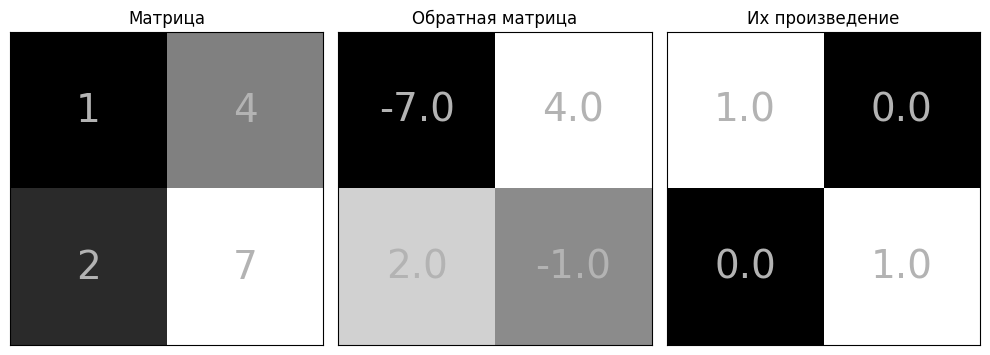

In [138]:
# Визуализируем матрицы
fig, axs = plt.subplots(1, 3, figsize=(10,6))

# Исходная матрица
axs[0].imshow(A, cmap='gray')
axs[0].set_title('Матрица')
# Отобразим значения в ячейках
for (i,j), num in np.ndenumerate(A):
    axs[0].text(j, i, num, color = [.7, .7, .7], ha='center', va='center', fontsize=28)

# Обратная матрица к исходной
axs[1].imshow(Ainv, cmap='gray')
axs[1].set_title('Обратная матрица')
# Отобразим значения в ячейках
for (i, j), num in np.ndenumerate(Ainv):
    axs[1].text(j, i, num, color=[.7, .7, .7], ha='center', va='center', fontsize=28)

# Их произведение (единичная матрица)
axs[2].imshow(A @ Ainv, cmap='gray')
axs[2].set_title('Их произведение')
# Отобразим значения в ячейках
for (i, j), num in np.ndenumerate(A@Ainv):
    axs[2].text(j, i, num, color=[.7, .7, .7], ha='center', va='center', fontsize=28)

# Общие свойтсва (уберем оси)
for i in range(3):
    axs[i].set_xticks([])
    axs[i].set_yticks([])

plt.tight_layout()
plt.show()

In [139]:
# Полная обратная матрица - двусторонняя
print(A @ Ainv), print()
print(Ainv @ A)

[[1. 0.]
 [0. 1.]]

[[1. 0.]
 [0. 1.]]


In [140]:
# Напоминание о необходимости использовать правильный оператор (@)
print(A * Ainv) # Адамарово умножение!

[[-7. 16.]
 [ 4. -7.]]


In [141]:
# Попробуем найти обратную марицу для сингулярное (вырожденной) матрицы
A = np.array([ [1, 4], [2, 8] ])

Ainv = np.linalg.inv(A)

# Получается ли единичная матрица? (Нет, так как не возможно создать единичную матрицу для сингулярной!)
A @ Ainv

LinAlgError: Singular matrix

# Обратная матрица диагональной матрицы

In [142]:
D = np.diag(range(1, 6))
Dinv = np.linalg.inv(D)

print('Диагональная матрица:')
print(D, '\n')

print('Её обратная матрица:')
print(np.round(Dinv, 2), '\n')

print('Их произведение:')
print(Dinv @ D)

Диагональная матрица:
[[1 0 0 0 0]
 [0 2 0 0 0]
 [0 0 3 0 0]
 [0 0 0 4 0]
 [0 0 0 0 5]] 

Её обратная матрица:
[[1.   0.   0.   0.   0.  ]
 [0.   0.5  0.   0.   0.  ]
 [0.   0.   0.33 0.   0.  ]
 [0.   0.   0.   0.25 0.  ]
 [0.   0.   0.   0.   0.2 ]] 

Их произведение:
[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]


# Левообратная матрица

In [143]:
# Создание обратимой квадратной матрицы из высокой матрицы с полным стобцовым рангом

# Высокая матрица
T = np.random.randint(-10, 11, size=(40, 4))
# Подтвердим, что она имеет максимально возможный ранг (полный ранг столбцов)
print(f'Ранг высокой матрицы равен: {np.linalg.matrix_rank(T)}\n\n')

# Далее создадим квадратную полноранговую матрицу
TtT = T.T @ T

# Проверим есть ли у неё обратная матрица
TtT_inv = np.linalg.inv(TtT)
print(np.round(TtT @ TtT_inv, 15))

Ранг высокой матрицы равен: 4


[[ 1. -0.  0.  0.]
 [-0.  1.  0. -0.]
 [-0. -0.  1.  0.]
 [-0. -0.  0.  1.]]


In [144]:
# Завершаем создание левообратной матрицы

# Наша левообратная матрица
L = TtT_inv @ T.T

# Проверим, что это работает
print(np.round(L @ T, 15))
print()
# Но только в одну сторону!
print(np.round(T @ L, 3))

[[ 1.  0.  0.  0.]
 [-0.  1.  0. -0.]
 [ 0. -0.  1.  0.]
 [ 0. -0. -0.  1.]]

[[ 0.092  0.022  0.006 ... -0.094 -0.021  0.055]
 [ 0.022  0.015 -0.001 ... -0.036 -0.01   0.023]
 [ 0.006 -0.001  0.164 ...  0.051  0.046 -0.033]
 ...
 [-0.094 -0.036  0.051 ...  0.133  0.045 -0.073]
 [-0.021 -0.01   0.046 ...  0.045  0.022 -0.021]
 [ 0.055  0.023 -0.033 ... -0.073 -0.021  0.092]]


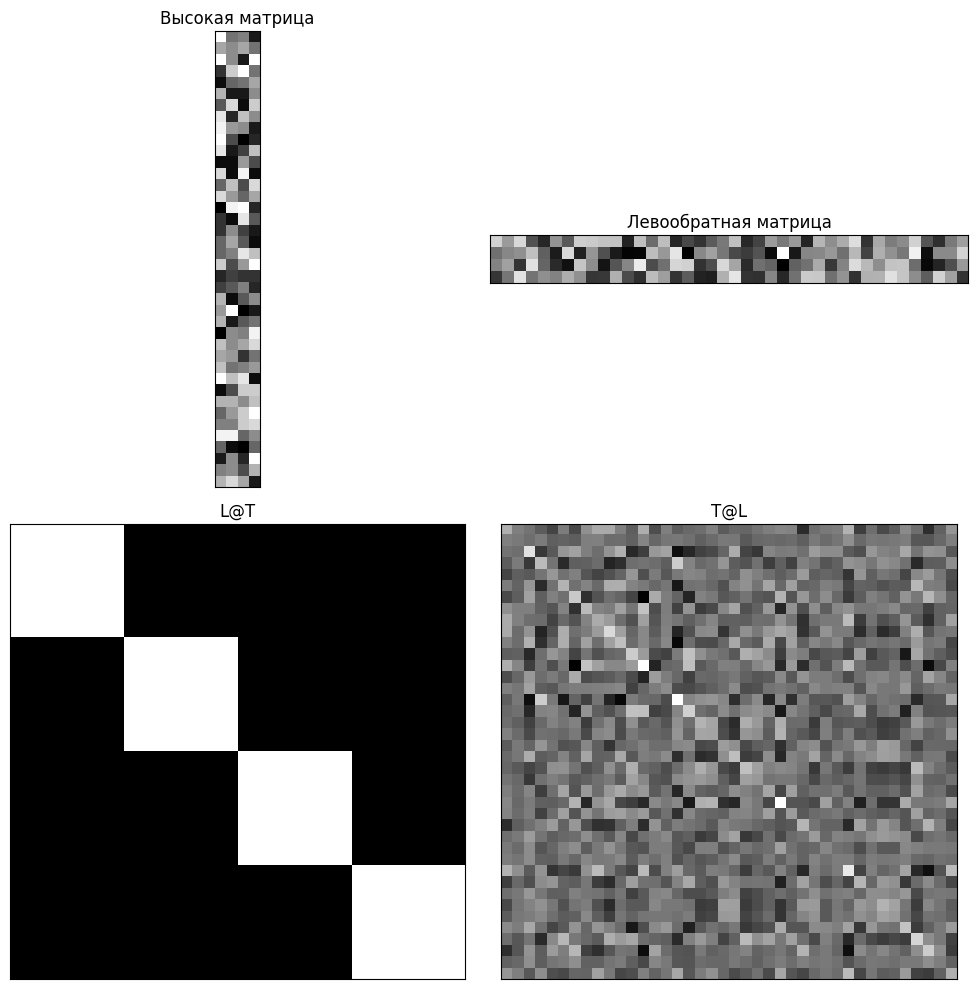

In [145]:
# Визуализируем
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

axs[0, 0].imshow(T, cmap='gray')
axs[0, 0].set_title("Высокая матрица")

axs[0, 1].imshow(L, cmap='gray')
axs[0, 1].set_title('Левообратная матрица')

axs[1, 0].imshow(L@T, cmap='gray')
axs[1, 0].set_title('L@T')

axs[1, 1].imshow(T@L, cmap='gray')
axs[1, 1].set_title("T@L")

# Уберем оси
for i in axs.flatten():
    i.set_xticks([])
    i.set_yticks([])

plt.tight_layout()
plt.show()

# Псевдообратная матрица Мура-Пенроуза (MP)

In [146]:
# Та же сингулярная матрица, что и раньше
A = np.array([ [1, 4], [2, 8] ])

# Её "инверсия"
Apinv = np.linalg.pinv(A)
print(Apinv*85), print(' ')

# Получится ли единичная матрица?
A @ Apinv

[[1. 2.]
 [4. 8.]]
 


array([[0.2, 0.4],
       [0.4, 0.8]])

Ранг этой матрицы: 5 



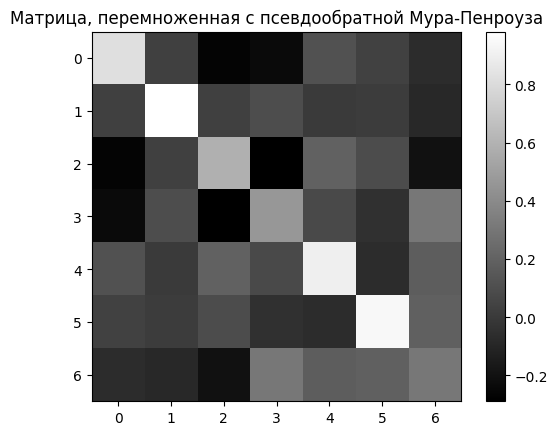

In [147]:
# Пример со случаными числами
A = np.random.randn(7, 5) @ np.random.randn(5, 7)
print(f'Ранг этой матрицы: {np.linalg.matrix_rank(A)} \n')

Apinv = np.linalg.pinv(A)
plt.imshow(A@Apinv, cmap='gray')
plt.title('Матрица, перемноженная с псевдообратной Мура-Пенроуза')
plt.colorbar()
plt.show()

# Упражнения по программированию

### Упражнение 1. Обратная матрица обратной матрицы будет изначальной. $(A^{-1})^{-1} = A$

In [148]:
n = 5
# Матрица
A = np.random.randn(n, n)

# Её обратная и обратная от обратной
Ainv = np.linalg.inv(A)
Aii = np.linalg.inv(Ainv)

# Равняется исходной матрицы за исключением вычислительной ошибки
print(np.round(A - Aii, 14))

[[-0.  0. -0.  0. -0.]
 [-0. -0.  0. -0.  0.]
 [-0. -0. -0. -0.  0.]
 [-0. -0.  0. -0.  0.]
 [ 0.  0.  0.  0. -0.]]


### Упражнение 2. Функция для получения обратной матрицы.

In [149]:
def Inversion(M, image=True):
    ''' Функция вычисляет обратную матрицу к данной. Если значение image=True, то выводятся изображения матриц миноров, решетки, кофакторов, 
    обратной матрицы, обратной из np.linalg.inv() и произведение начальной матрицы на обратную.
    '''
    # Размер матрицы
    n = M.shape[0]
    # Основа для обратной матрицы
    invers = np.zeros((n, n))
    # Далее создаем матрицу миноров
    minors = np.zeros((n, n))
    for (i, j), _ in np.ndenumerate(minors):
        minor = np.delete(np.delete(M, j, 1), i, 0)
        minors[i, j] = np.linalg.det(minor)
    # Создадим матрицу-решетку
    grid = np.zeros((n, n))
    for (i, j), _ in np.ndenumerate(grid):
        grid[i, j] = (-1) ** (i + j)
    # Матрица кофакторов
    cofactors = grid * minors
    # Матрица присоединений (обратная матрица)
    inv = cofactors.T / np.linalg.det(M)

    # Изобразим матрицы
    if image:
        # Подготовим list для цикла for
        matrixes = [minors, grid, cofactors, inv, np.linalg.inv(M), M@inv]
        titles = ['Матрица миноров', 'Матрица-решетка', "Матрица кофакторов", 'Обратная матрица', 'Обратная матрица из np.linalg', 'M@Minv']
        fig, axs = plt.subplots(2, 3, figsize=(14, 7))
        ax = axs.flatten()
        for i in range(6):
            ax[i].imshow(matrixes[i], cmap='gray', vmin=np.min(matrixes[i]), vmax=np.max([matrixes[i]]))
            ax[i].set_title(titles[i])
            ax[i].set_xticks([])
            ax[i].set_yticks([])
        plt.show()
    return inv

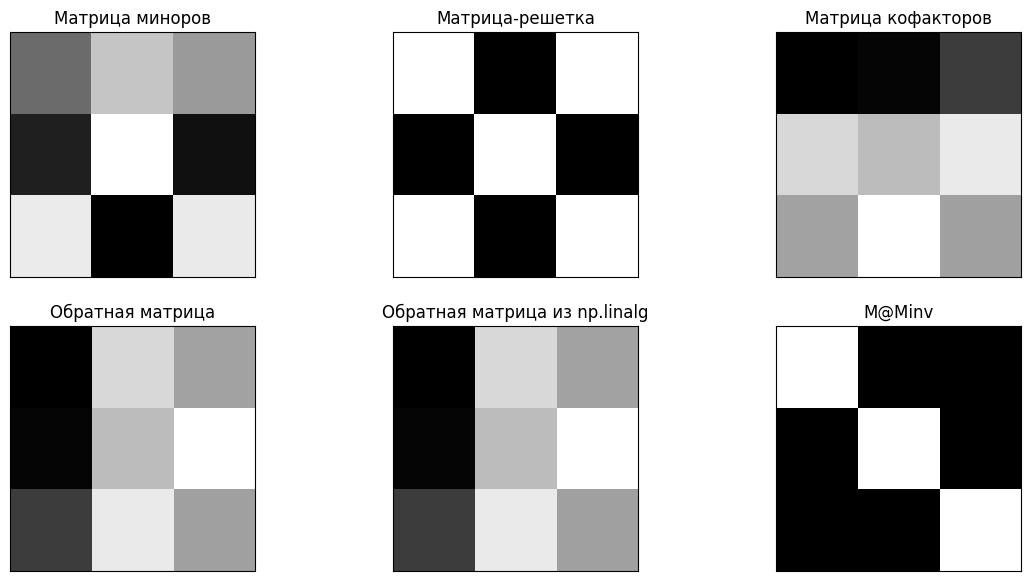

[[-3.85460231e-01  1.00039337e+00  6.53239442e-01]
 [-3.49784255e-01  8.20170855e-01  1.25283407e+00]
 [-1.45311495e-04  1.11720708e+00  6.42915354e-01]]


In [150]:
# Проверим на случйной матрице
M = np.random.randn(3, 3)
print(Inversion(M))

In [151]:
# Выведем разницу нашей обратной и обратной матрицы из numpy
print(Inversion(M, image=False) - np.linalg.inv(M))

[[-5.55111512e-17  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-3.16587034e-17  2.22044605e-16  1.11022302e-16]]


### Упражнение 3. Реализовать алгоритм вычисления обратной матрицы для матрицы 2х2 вручную.

### Упражнение 4. Реализовать правообратную матрицу для широкой матрицы.

In [152]:
# Реализуем в виде функции, в которую подается широкая матрица, а возращается правообратная ей
def rightInv(W):
    if np.linalg.matrix_rank(W) != W.shape[0]:
        return print('Для неполноранговых широких матриц нет правообратных.')
    # Создадим квадратную полноранговую матрицу
    WWt = W @ W.T
    # Найдем обраную ей матрицу
    WWtInv = np.linalg.inv(WWt)
    # Запишем правостороннюю матрицу
    R = W.T @ WWtInv
    return R

In [163]:
# Запишем широкую матрицу
Wid = np.random.randint(-10, 11, size=(4, 40))
# Проверим ранг
print(f' Ранг данной матрицы равен: {np.linalg.matrix_rank(Wid)}.')
print()

# правосторонняя матрица
Right = rightInv(Wid)
# Произведем постпроизведение правосторонней матрицы с начальной
print(np.round(Wid@Right, 14))
print()

# С другой стороны (неправильно!)
print(np.round(Right@Wid, 3))

 Ранг данной матрицы равен: 4.

[[ 1.  0. -0. -0.]
 [-0.  1. -0. -0.]
 [-0. -0.  1.  0.]
 [-0.  0. -0.  1.]]

[[ 0.042 -0.021 -0.048 ... -0.012  0.022  0.014]
 [-0.021  0.074  0.049 ... -0.044 -0.065  0.084]
 [-0.048  0.049  0.144 ... -0.069 -0.059 -0.014]
 ...
 [-0.012 -0.044 -0.069 ...  0.125  0.112 -0.056]
 [ 0.022 -0.065 -0.059 ...  0.112  0.186 -0.082]
 [ 0.014  0.084 -0.014 ... -0.056 -0.082  0.149]]


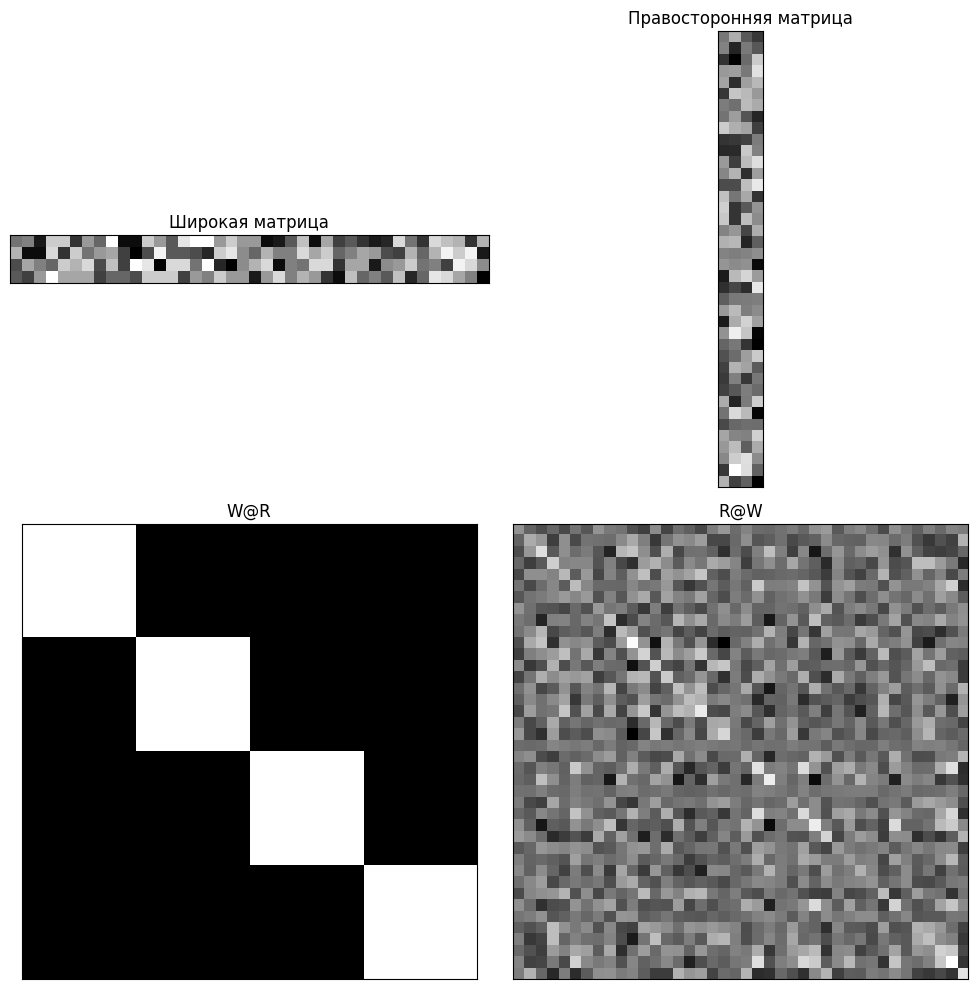

In [169]:
# Визуализируем матрицы
fig, axs = plt.subplots(2, 2, figsize=(10,10))

axs[0, 0].imshow(Wid, cmap='gray')
axs[0, 0].set_title('Широкая матрица')

axs[0, 1].imshow(Right, cmap='gray')
axs[0, 1].set_title('Правосторонняя матрица')

axs[1, 0].imshow(Wid @ Right, cmap='gray')
axs[1, 0].set_title('W@R')

axs[1, 1].imshow(Right@Wid, cmap='gray')
axs[1, 1].set_title('R@W')

# Уберем оси
for a in axs.flatten():
    a.set_xticks([])
    a.set_yticks([])

plt.tight_layout()
plt.show()

### Упражнение 5. Псевдообратная матрица для полноранговых матриц.

In [4]:
# Псевдообратная матрица для квадратной полной матрице
m = 4

A = np.random.randn(m, m)

Ainv = np.linalg.inv(A)
Apinv = np.linalg.pinv(A)

# Выведем разность псевдообратной и обратной матриц
print(np.round(Ainv-Apinv, 14))

[[ 0.  0.  0. -0.]
 [-0. -0.  0. -0.]
 [-0.  0. -0. -0.]
 [-0.  0. -0. -0.]]


In [6]:
# Для левообратных матриц
n, m = 14, 4
H = np.random.randn(n, m)

L = np.linalg.inv(H.T@H) @ H.T
Hpinv = np.linalg.pinv(H)

# Выведем разность этих матриц
print(np.round(L-Hpinv, 14))

[[ 0.  0.  0.  0.  0. -0. -0.  0.  0. -0. -0. -0. -0.  0.]
 [-0. -0.  0. -0.  0.  0.  0. -0.  0.  0.  0. -0. -0.  0.]
 [ 0.  0.  0.  0.  0. -0. -0. -0.  0. -0.  0. -0. -0.  0.]
 [-0. -0. -0. -0. -0.  0.  0. -0.  0.  0.  0.  0.  0. -0.]]


In [7]:
# Для правообратной матрицы
n, m = 4, 14
W = np.random.randn(n, m)

R = W.T @ np.linalg.inv(W@W.T)
Wpinv = np.linalg.pinv(W)

# Выведем разность правообратной и псевдообратной матриц
print(np.round(R - Wpinv, 14))

[[-0.  0.  0.  0.]
 [ 0. -0.  0. -0.]
 [-0. -0.  0.  0.]
 [-0. -0. -0.  0.]
 [-0.  0.  0. -0.]
 [-0.  0.  0. -0.]
 [-0.  0.  0. -0.]
 [ 0.  0.  0. -0.]
 [ 0. -0.  0. -0.]
 [-0. -0. -0.  0.]
 [-0.  0.  0.  0.]
 [ 0. -0. -0.  0.]
 [ 0. -0.  0. -0.]
 [-0. -0. -0.  0.]]


### Упражнение 6. Правило LIVE EVIL для обратной матрицы произведения.

In [15]:
# Создадим две матрицы
n = 4
A = np.random.randn(n, n)
B = np.random.randn(n, n)

# Вычислим три указанных матриц
AB_inv = np.linalg.inv(A@B)
AinvBinv = np.linalg.inv(A) @ np.linalg.inv(B)
BinvAinv = np.linalg.inv(B) @ np.linalg.inv(A)

# Вычислим расстояние между матрицами
dist1 = np.sqrt(np.sum((AB_inv-AinvBinv) ** 2))
dist2 = np.sqrt(np.sum((AB_inv - BinvAinv) ** 2))

# Выведем результаты
print(f'Расстояние между (AB)^-1 и (A^-1)(B^-1) равно {dist1:.8f}')
print(f'Расстояние между (AB)^-1 и (B^-1)(A^-1) равно {dist2:.8f}')

Расстояние между (AB)^-1 и (A^-1)(B^-1) равно 12.50053692
Расстояние между (AB)^-1 и (B^-1)(A^-1) равно 0.00000000


In [21]:
# Дополнительная задача. Приеним правило LIVE EVIL к 4 случаным матрицам
A1 = np.random.randn(n, n)
A2 = np.random.randn(n, n)
A3 = np.random.randn(n, n)
A4 = np.random.randn(n, n)

A1A2A3A4_inv = np.linalg.inv(A1@A2@A3@A4)
A4invA3invA2invA1inv = np.linalg.inv(A4) @ np.linalg.inv(A3) @ np.linalg.inv(A2) @ np.linalg.inv(A1) 

print(np.round(A1A2A3A4_inv-A4invA3invA2invA1inv, 4))

[[-0. -0.  0.  0.]
 [-0. -0.  0.  0.]
 [-0. -0.  0.  0.]
 [ 0.  0. -0. -0.]]


### Упражнение 7. Правило LIVE EVIL к квадратной матрице, образованной из неквадратных матриц.

In [8]:
# Зададим высокую матрицу
T = np.random.randn(14, 4)
# Создадим квадратную матрицу
TtT = T.T @ T
# Обратная ей матрица
TtT_inv = np.linalg.inv(TtT)
# Обратная по правилу LIVE EVIL
T_invTt_inv = np.linalg.inv(T) @ np.linalg.inv(T.T)

# Сравним их
print(np.round(TtT - T_invTt_inv, 10))
# Само собой python пишет об ошибке, так как высокая матрица не имеет обратную.

LinAlgError: Last 2 dimensions of the array must be square

### Упражнение 8. Геометрическая интерпритация обратной матрицы.

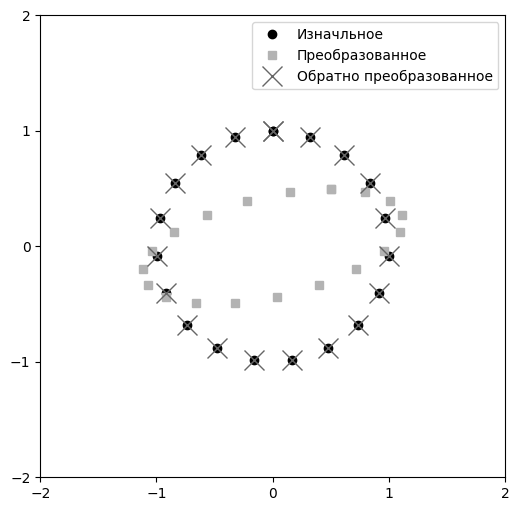

In [29]:
# Матрица преобразования
T =  np.array([
    [1, .5],
    [0, .5]
])

# Создадим точки
theta = np.linspace(0, 2*np.pi, 20)
origPoints = np.vstack((np.sin(theta), np.cos(theta)))

# Преобразуем точки посредством матрицы
TransfornedPoints = T @ origPoints

# Создадим матрицу, обратную матрице преобразования
Tinv = np.linalg.inv(T)

# Преобразуем транформированные точки к начальному положению
backTransformedPoints = Tinv @ TransfornedPoints

# Изобразим на графике
plt.figure(figsize=(6, 6))
plt.plot(origPoints[0, :], origPoints[1, :], 'ko', label='Изначльное')
plt.plot(TransfornedPoints[0, :], TransfornedPoints[1, :], 's', color=[.7, .7, .7], label = 'Преобразованное')
plt.plot(backTransformedPoints[0, :], backTransformedPoints[1, :], 'x', color=[.4, .4, .4], label='Обратно преобразованное', markersize=14)
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.xticks(range(-2, 3))
plt.yticks(range(-2, 3))

plt.legend()
plt.show()

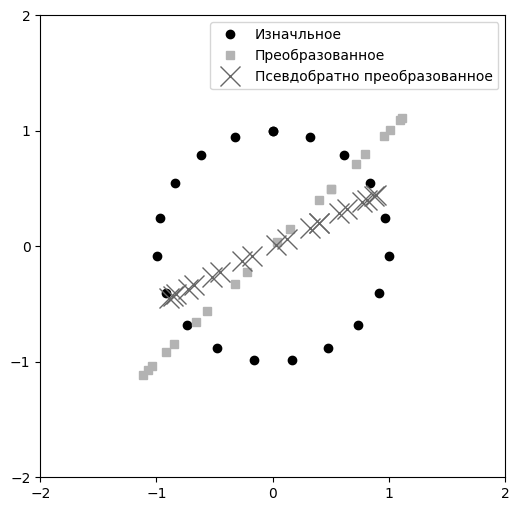

In [30]:
# теперь сделаем матрицу преобразования сингулярной
# Матрица преобразования
T =  np.array([
    [1, .5],
    [1, .5]
])

# Создадим точки
theta = np.linspace(0, 2*np.pi, 20)
origPoints = np.vstack((np.sin(theta), np.cos(theta)))

# Преобразуем точки посредством матрицы
TransfornedPoints = T @ origPoints

# Создадим матрицу, обратную матрице преобразования
Tinv = np.linalg.pinv(T)

# Преобразуем транформированные точки к начальному положению
backTransformedPoints = Tinv @ TransfornedPoints

# Изобразим на графике
plt.figure(figsize=(6, 6))
plt.plot(origPoints[0, :], origPoints[1, :], 'ko', label='Изначльное')
plt.plot(TransfornedPoints[0, :], TransfornedPoints[1, :], 's', color=[.7, .7, .7], label = 'Преобразованное')
plt.plot(backTransformedPoints[0, :], backTransformedPoints[1, :], 'x', color=[.4, .4, .4], label='Псевдобратно преобразованное', markersize=14)
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.xticks(range(-2, 3))
plt.yticks(range(-2, 3))

plt.legend()
plt.show()

In [31]:
# Мы видим, что псевдообратное преобразование не вернуло точки в начальное положение, но оно распространило их внутри начального
# круга.
# Невозможно вернуть точки в начльное положение, если произошло понижение размерности.

### Упражнение 9. Функция, создающая матрицу Гильберта.

In [4]:
# Напишем функцию для создания матрицы Гильберта, использующую циклы
def HilbMat1(n):
    # Шаблон для матрицы
    Hilb = np.zeros((n, n))
    # Циклом зададим правило создания матрицы
    # Матрица Гильберта задается правилом h[i, j] = 1 / (i + j - 1)
    # Так как в python индексация начинается с нуля, а в математике с 1,
    # то в python правило выглядит следующи образом h[i, j] = 1 / ((i + 1) + (j + 1) - 1) = 1 / (i + j + 1)
    for i in range(n):
        for j in range(n):
            Hilb[i, j] = 1 / (i + j + 1)

    return Hilb

# Напишем вторую функцию, использующую не цикл, а транслирование векторов
def HilbMat2(n):
    # Основа для матрицы
    vect = np.arange(1, n + 1).reshape(1, -1)
    return 1 / (vect + vect.T - 1)

In [90]:
# Посмотрим на скорость выполнения функций
import time
start1 = time.time()
H1 = HilbMat1(1000)
end1 = time.time() - start1


start2 = time.time()
H1 = HilbMat1(1000)
end2 = time.time() - start2

print(end1, end2)

0.22251391410827637 0.19817066192626953


In [5]:
#  Проверим нашу функцию, сравнив результат с функцией из scipy
print(HilbMat2(6)), print()

# функция из scipy
from scipy.linalg import hilbert
print(hilbert(6))
# Убеждаемся, что матрицы идентичны.

[[1.         0.5        0.33333333 0.25       0.2        0.16666667]
 [0.5        0.33333333 0.25       0.2        0.16666667 0.14285714]
 [0.33333333 0.25       0.2        0.16666667 0.14285714 0.125     ]
 [0.25       0.2        0.16666667 0.14285714 0.125      0.11111111]
 [0.2        0.16666667 0.14285714 0.125      0.11111111 0.1       ]
 [0.16666667 0.14285714 0.125      0.11111111 0.1        0.09090909]]

[[1.         0.5        0.33333333 0.25       0.2        0.16666667]
 [0.5        0.33333333 0.25       0.2        0.16666667 0.14285714]
 [0.33333333 0.25       0.2        0.16666667 0.14285714 0.125     ]
 [0.25       0.2        0.16666667 0.14285714 0.125      0.11111111]
 [0.2        0.16666667 0.14285714 0.125      0.11111111 0.1       ]
 [0.16666667 0.14285714 0.125      0.11111111 0.1        0.09090909]]


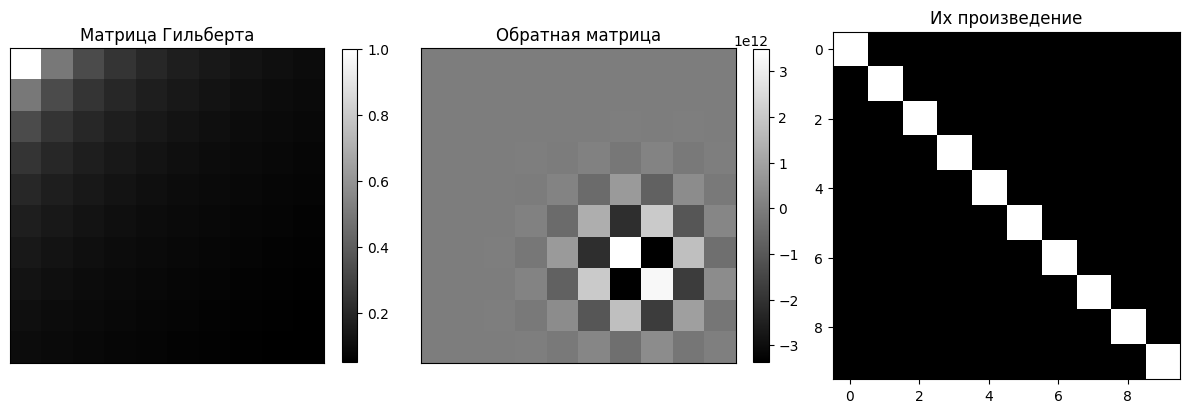

In [6]:
# Создадим матрицу Гильберта 5х5. Изобразим её, обратную ей и их произведение
HM = HilbMat2(10)
HMi = np.linalg.inv(HM)

fig, axs = plt.subplots(1, 3, figsize=(12, 6))
h = [0, 0, 0] # Создаем список для хранения графиков для создания colorbar

h[0] = axs[0].imshow(HM, cmap='gray')
axs[0].set_title('Матрица Гильберта')

h[1] = axs[1].imshow(HMi, cmap='gray')
axs[1].set_title('Обратная матрица')

h[2] = axs[2].imshow(HM @ HMi, cmap='gray', vmin=0, vmax=1)
axs[2].set_title('Их произведение')

# Добавим бары к 1 и 2 графикам
for i in range(2):
    plt.colorbar(h[i], ax=axs[i], fraction=0.045)
    axs[i].set_xticks([])
    axs[i].set_yticks([])

plt.tight_layout()
plt.show()

### Упражнение 10. Рассмотрим численную стабильность матрицы Гильберта.

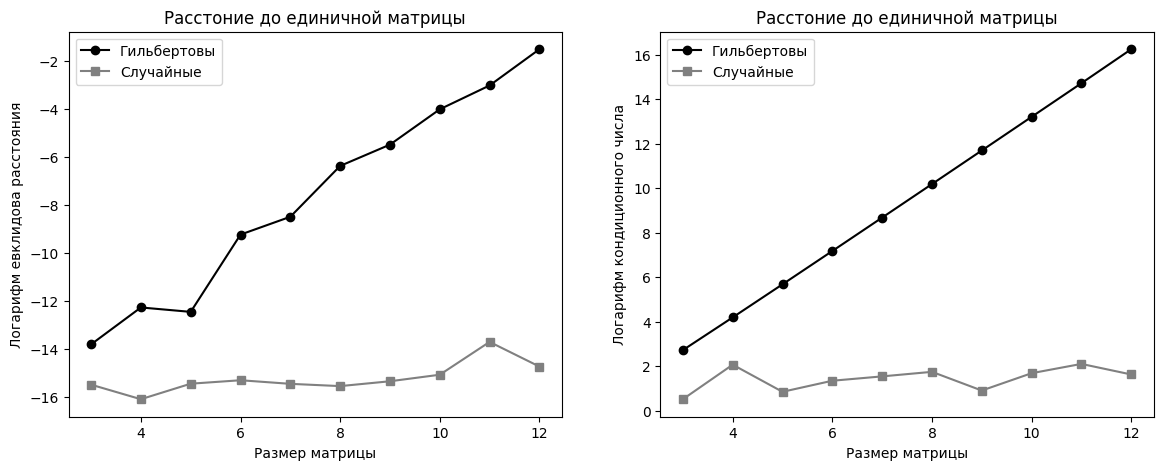

In [94]:
# Создадим вектор с размером матриц и тензор для хранения расстояния до единичной матрицы и кондиционных чисел
shapeMat = np.arange(3, 13)
resultMat = np.zeros((2, len(shapeMat), 2))
# Зададим цикл для создания матриц разного размера
for i in shapeMat:
    # Создадим гильбертову матрицу и обратную к ней
    H = HilbMat2(i)
    Hi = np.linalg.inv(H)
    # Создадим случайную матрицу и обратную к ней
    Random = np.random.randn(i, i)
    Ri = np.linalg.inv(Random)
    # Создадим единичную матрицу для сравнения с произведением матриц с обратными
    I = np.eye(i)
    # Вычислим расстояния между произведениями матриц на обратные и единичной матрицы
    distH = np.sqrt(np.sum(H@Hi - I) ** 2)
    distR = np.sqrt(np.sum(Random@Ri - I) ** 2)
    # Вычислим кондиционные числа
    condH = np.linalg.cond(H)
    condR = np.linalg.cond(Random)
    # Сохраним эти значения в тензор
    resultMat[0, i - shapeMat[0], :] = distH, distR
    resultMat[1, i - shapeMat[0], :] = condH, condR

# Визуализируем результаты
fig, axs = plt.subplots(1, 2, figsize=(14, 5))
h = axs[0].plot(shapeMat, np.log10(resultMat[0, :, :]), 'ko-')
h[1].set_color('grey')
h[1].set_marker('s')
h[1].set_label('Случайные')
h[0].set_label('Гильбертовы')

axs[0].set_title('Расстоние до единичной матрицы')
axs[0].set_xlabel('Размер матрицы')
axs[0].set_ylabel('Логарифм евклидова расстояния')
axs[0].legend()

h = axs[1].plot(shapeMat, np.log10(resultMat[1, :, :]), 'ko-')
h[1].set_color('grey')
h[1].set_marker('s')
h[1].set_label('Случайные')
h[0].set_label('Гильбертовы')

axs[1].set_title('Расстоние до единичной матрицы')
axs[1].set_xlabel('Размер матрицы')
axs[1].set_ylabel('Логарифм кондиционного числа')
axs[1].legend()

plt.show()